# EasyOCR Evaluation - Stringvergleich

In diesem Notebook wird der OCR von EasyOCR evaluiert.   
Dazu wird der von EasyOCR extrahierte Text als String mit dem Ground-Truth-String verglichen und WER und CER berechnet. 

Character Accuracy und Word Accuracy werde nicht berrechnen. Sie sind für die Evaluation nicht von Bedeutung.



---

### 1. Textextraktion
---

#### 1.1 Textextraktion auf einem einzelnen Bild 

In [22]:
import easyocr

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [23]:
reader = easyocr.Reader(['de'])  

Das Ergebnis wird zeilenweise als String ausgegeben, ohne die Anzeige der Boundingbox, dafür wurde detail auf "0" gesetzt

In [24]:
result = reader.readtext('../../data/images/insta_images/0001.jpg', detail=1) # bei 0 wird boundingbox wird nicht angezeigt
print(result)

[([[175, 201], [943, 201], [943, 335], [175, 335]], 'SPRACHCAFE', 0.9974398815543888), ([[131, 351], [981, 351], [981, 459], [131, 459]], 'WEIFNACHTSFEIER', 0.4926375189490662), ([[543, 753], [805, 753], [805, 795], [543, 795]], 'DIENSTAG 21.12_', 0.9412396003131693), ([[497, 797], [859, 797], [859, 839], [497, 839]], 'OLOF-PALME ZENTRUM', 0.8671259180937123), ([[619, 851], [739, 851], [739, 891], [619, 891]], '19 UHR', 0.9696392062942848), ([[453, 901], [903, 901], [903, 943], [453, 943]], 'WIR FREUEN UNS AUF EUCH!', 0.4612888053121199)]


bei de+en

['SchlIEsst Eucx Any', 'EI Videc & Contert', 'nIchtohneuns_Dresce:', 'KUNDGEBUNG', '#SOLIDARITÄT MIT ALLEN!', 'BerICHTE: WIE WAR DIE BERLIN-DEMO WIRKLICH?', 'Dresden, Großer Garten, 8.8. um 16 Uhr']

---

#### 1.2 Textextraktion auf gesamten Datensatz 

In [52]:
# laden des ground truth
import pandas as pd
df = pd.read_csv("../../data/image_data_with_groundtruth.csv")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [75]:
import os
import json
import pandas as pd
from PIL import Image
import easyocr

reader = easyocr.Reader(['de'])


import sys # ermöglicht Zugriff auf übergeordnetes Verzeichnis
sys.path.append(os.path.abspath(".."))
from ressourcen_monitor import monitor

IMAGE_PATH_BASE = os.path.join("../../data/images/insta_images")


def extract_text_from_image(image_path):
    try:
        img = Image.open(image_path)
        text = reader.readtext(img, detail=0) # easyOCR gibt Liste von Strings zurück
        return " ".join(text).strip()
    except Exception as e:
        return f"Fehler: {e}"


def get_ocr_text(name):
    image_path = os.path.join(IMAGE_PATH_BASE, name)
    return extract_text_from_image(image_path)


@monitor(full_name="EasyOCR OCR") # kann nur bei Funktionen angewendet werden
def apply_ocr():
    df["ocr_easyocr"] = df["file_name"].apply(get_ocr_text)  



In [76]:
apply_ocr()

[codecarbon WARNING @ 23:32:45] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon WARNING @ 23:32:45] Error while trying to count physical CPUs: [Errno 2] No such file or directory: 'lscpu'. Defaulting to 1.
[codecarbon INFO @ 23:32:45] [setup] RAM Tracking...
[codecarbon INFO @ 23:32:45] [setup] CPU Tracking...
[codecarbon WARNING @ 23:32:45] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 23:32:45] CPU Model on constant consumption mode: Apple M1 Max
[codecarbon WARNING @ 23:32:45] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 23:32:45] [setup] GPU Tracking...
[codecarbon INFO @ 23:32:45] No GPU found.
[codecarbon INFO @ 23:32:45] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global const


--- Ressourcenbericht für 'EasyOCR OCR' ---
CPU-Zeit:     33.66 s
RAM genutzt:  370.33 MB
Laufzeit:     83.67 s
CO₂-Ausstoß:  0.000052 kg
-------------------------------------------



Ressourcenbericht für 'EasyOCR OCR'   
CPU-Zeit:     33.66 s  
RAM genutzt:  370.33 MB  
Laufzeit:     83.67 s  
CO₂-Ausstoß:  0.000052 kg  

In [55]:
df[["file_name", "category", "ground_truth", "ocr_easyocr" ]].head(5)

,file_name,category,ground_truth,ocr_easyocr
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,SPRACHCAFE WEIFNAGHTSFEIER DIENSTAG 21.12_ OLO...
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,Schliesst Eucx ANy EI Videc & Contert EIchtohn...
2,0003.jpg,noisy,»ES IST GESCHEHEN UND FOLGLICH KANN ES WIEDER ...,Gedenkkundgebung und antifaschistische Demonst...
3,0004.jpg,noisy,FEIERABEND SINGEN KULTUR NETZ Meiendorf IMMER ...,FEIERABEND KULTUR NETZ Meiendorf SINGEN 8 8 40...
4,0006.jpg,noisy,IHR HABT UNS DIE STADT GESTOHLEN GEBT SIE WIED...,CIv:V:UnA DIESTADIE GESTOHLEN @GEBTISIE Qhmtgs...


In [56]:
# csv erstellen
df.to_csv("../../data/OCR/easyocr/easyocr_evaluation_00_stringwise.csv", index=False) 

In [57]:
df = pd.read_csv("../../data/OCR/easyocr/easyocr_evaluation_00_stringwise.csv")
df.drop( ["original name", "URL", "Plattform", "channel name", "OCR_ChatGPT4"], axis=1, inplace=True)
df.to_csv("../../data/OCR/easyocr/easyocr_evaluation_00_stringwise.csv", index=False) 
df.head(1)

,file_name,category,ground_truth,ocr_easyocr
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,SPRACHCAFE WEIFNAGHTSFEIER DIENSTAG 21.12_ OLO...


In [58]:
df.shape

(200, 4)

In [59]:
df['ocr_easyocr'].isna().sum()

0

In [60]:
ocr = df["ocr_easyocr"].iloc[0]
print(ocr)

SPRACHCAFE WEIFNAGHTSFEIER DIENSTAG 21.12_ OLOF-PALME ZENTRUM 19 UHR WIR FREUEN UNS AUF EUCH!


---
### 2. Evaluation

#### Berechnung von CER und WER

In [61]:
import sys 
sys.path.append(os.path.abspath("../../utils"))
from funktionen import calculate_wer,calculate_cer 

df['cer'] = df.apply(lambda row: calculate_cer(row['ground_truth'], row['ocr_easyocr']), axis=1)
df['wer'] = df.apply(lambda row: calculate_wer(row['ground_truth'], row['ocr_easyocr']), axis=1)

In [62]:
df.head(3)

,file_name,category,ground_truth,ocr_easyocr,cer,wer
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,SPRACHCAFE WEIFNAGHTSFEIER DIENSTAG 21.12_ OLO...,0.032258,0.153846
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,Schliesst Eucx ANy EI Videc & Contert EIchtohn...,0.113636,0.320000
2,0003.jpg,noisy,»ES IST GESCHEHEN UND FOLGLICH KANN ES WIEDER ...,Gedenkkundgebung und antifaschistische Demonst...,0.563467,0.710526


In [63]:
cer_mean_all = df["cer"].mean()
print(f"Durchschnittlicher CER : {cer_mean_all * 100:.2f}%")
print("Durchschnittlicher CER :", cer_mean_all)

Durchschnittlicher CER : 40.66%
Durchschnittlicher CER : 0.4066345750422476


In [64]:
wer_mean_all = df["wer"].mean()
print(f"Durchschnittlicher WER : {wer_mean_all * 100:.2f}%")
print("Durchschnittlicher WER :", wer_mean_all)

Durchschnittlicher WER : 64.94%
Durchschnittlicher WER : 0.6493866468564947


In [65]:
WER_by_category = df.groupby("category")["wer"].mean().sort_values(ascending=True)
CER_by_category = df.groupby("category")["cer"].mean().sort_values(ascending=True)
print("Durchschnittlicher CER pro Kategorie:", CER_by_category)
print("Durchschnittlicher WER pro Kategorie:", WER_by_category)

Durchschnittlicher CER pro Kategorie: category
simple    0.265833
noisy     0.424156
fancy     0.448126
photo     0.452640
skewed    0.582950
Name: cer, dtype: float64
Durchschnittlicher WER pro Kategorie: category
simple    0.455966
fancy     0.693541
noisy     0.731497
skewed    0.788824
photo     0.819492
Name: wer, dtype: float64


### OCR Text normalisieren

In [66]:
def normalize_text(ocr):
    return ' '.join(str(ocr).split()) 

def apply_normalize_text(row):
    return normalize_text(row.ocr_easyocr)

df["normalized_ocr_easyocr"] = df.apply(apply_normalize_text, axis=1)

In [67]:
df.head(3)

,file_name,category,ground_truth,ocr_easyocr,cer,wer,normalized_ocr_easyocr
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,SPRACHCAFE WEIFNAGHTSFEIER DIENSTAG 21.12_ OLO...,0.032258,0.153846,SPRACHCAFE WEIFNAGHTSFEIER DIENSTAG 21.12_ OLO...
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,Schliesst Eucx ANy EI Videc & Contert EIchtohn...,0.113636,0.320000,Schliesst Eucx ANy EI Videc & Contert EIchtohn...
2,0003.jpg,noisy,»ES IST GESCHEHEN UND FOLGLICH KANN ES WIEDER ...,Gedenkkundgebung und antifaschistische Demonst...,0.563467,0.710526,Gedenkkundgebung und antifaschistische Demonst...


### Berechnung CER und WER auf normalized Text

In [68]:
import sys # ermöglicht Zugriff auf übergeordnetes Verzeichnis
sys.path.append(os.path.abspath("../../utils"))
from funktionen import calculate_wer,calculate_cer 

df['cer2'] = df.apply(lambda row: calculate_cer(row['ground_truth'], row['normalized_ocr_easyocr']), axis=1)
df['wer2'] = df.apply(lambda row: calculate_wer(row['ground_truth'], row['normalized_ocr_easyocr']), axis=1)

In [69]:
cer_mean_all = df["cer2"].mean()
print(f"Durchschnittlicher CER normalisierter Text : {cer_mean_all * 100:.2f}%")
print("Durchschnittlicher CER normalisierter Text :", cer_mean_all)

Durchschnittlicher CER normalisierter Text : 40.61%
Durchschnittlicher CER normalisierter Text : 0.40608049210017805


In [70]:
wer_mean_all = df["wer2"].mean()
print(f"Durchschnittlicher WER normalisierter Text: {wer_mean_all * 100:.2f}%")
print("Durchschnittlicher WER normalisierter Text:", wer_mean_all)

Durchschnittlicher WER normalisierter Text: 64.94%
Durchschnittlicher WER normalisierter Text: 0.6493866468564947


In [71]:
WER2_by_category = df.groupby("category")["wer2"].mean().sort_values(ascending=True)
CER2_by_category = df.groupby("category")["cer2"].mean().sort_values(ascending=True)
print("Durchschnittlicher CER pro Kategorie - normailisierter Text:", CER2_by_category)
print("Durchschnittlicher WER pro Kategorie: - normailisierter Text", WER2_by_category)

Durchschnittlicher CER pro Kategorie - normailisierter Text: category
simple    0.265577
noisy     0.424190
fancy     0.447845
photo     0.450733
skewed    0.581600
Name: cer2, dtype: float64
Durchschnittlicher WER pro Kategorie: - normailisierter Text category
simple    0.455966
fancy     0.693541
noisy     0.731497
skewed    0.788824
photo     0.819492
Name: wer2, dtype: float64


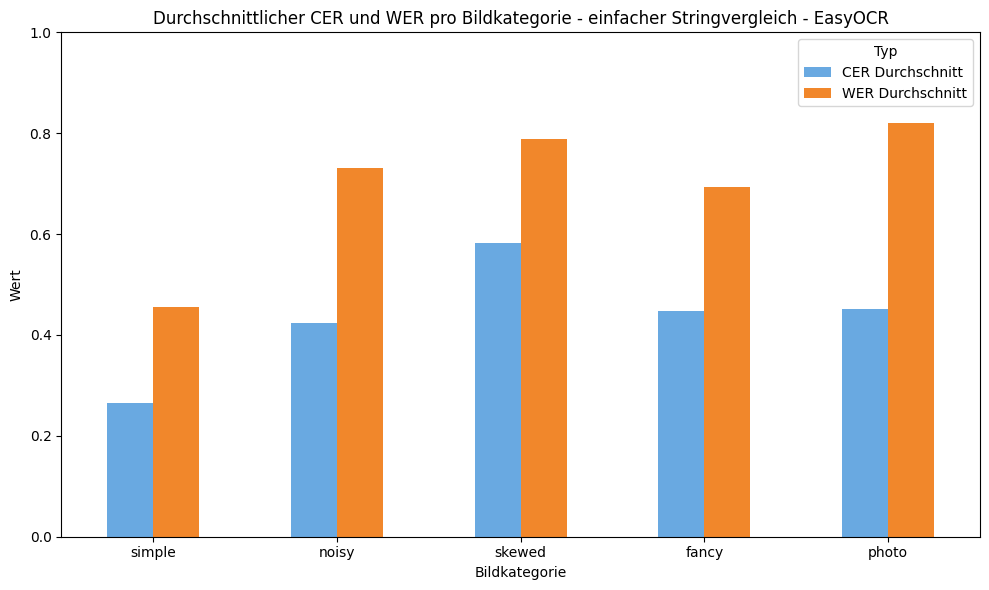

In [72]:
import matplotlib.pyplot as plt
import pandas as pd


categories = ['simple', 'noisy', 'skewed', 'fancy', 'photo']

# Mittelwerte berechnen
WER_by_category = df.groupby("category")["wer2"].mean() 
CER_by_category = df.groupby("category")["cer2"].mean() 


# Zusammenführen zu einem DataFrame
df_combined = pd.DataFrame({
    "CER Durchschnitt": CER_by_category,
    "WER Durchschnitt": WER_by_category
})

df_combined = df_combined.loc[categories]

farben = ["#69A9E1", "#F1872B"]

# Plot
ax = df_combined.plot(kind="bar", figsize=(10, 6), color=farben)
plt.title("Durchschnittlicher CER und WER pro Bildkategorie - einfacher Stringvergleich - EasyOCR")
plt.ylabel("Wert")
plt.xlabel("Bildkategorie")
plt.xticks(rotation=0)
plt.legend(title="Typ")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [73]:
df.to_csv("../../data/OCR/easyocr/easyocr_evaluation_00_stringwise.csv", index=False) 